# This notebook performs tasks for the 08/05/25 meeting
#### Shared doc: https://docs.google.com/document/d/1sHDFxsh4fMPO40zx09iNzCzoPbF_o8x5ksXAXNOoD3M/edit?usp=sharing

In [1]:
genome_ids = ['HG00613', 'HG00692', 'HG00479', 'HG00536', 'HG00583', 'HG00565', 'HG00566', 'HG00701', 'HG00500', 'HG00620', 'HG00525', 'HG00656', 'HG00443', 'HG00698', 'HG00473', 'HG00542', 'HG00593', 'HG00464', 'HG00653', 'HG00650', 'HG00632', 'HG00580', 'HG00607', 'HG00634', 'HG00543', 'HG00651', 'HG00704', 'HG00614', 'HG00683', 'HG00537', 'HG00599', 'HG00472', 'HG00531', 'HG00448', 'HG00452', 'HG00476', 'HG00623', 'HG00608', 'HG00421', 'HG00409', 'HG00729', 'HG00403', 'HG00404', 'HG00654', 'HG00684', 'HG00619', 'HG00581', 'HG00625', 'HG00584', 'HG00524', 'HG00428', 'HG00478', 'HG00560', 'HG00446', 'HG00626', 'HG00671', 'HG00610', 'HG00717', 'HG00662', 'HG00442', 'HG00693', 'HG00534', 'HG00410', 'HG00689', 'HG00707', 'HG00672', 'HG00592', 'HG00407', 'HG00699', 'HG00690', 'HG00419', 'HG00406', 'HG00705', 'HG00674', 'HG00533', 'HG00457', 'HG00657', 'HG00596', 'HG00463', 'HG00631', 'HG00628', 'HG00559', 'HG00513', 'HG00598', 'HG00556', 'HG00589', 'HG00629', 'HG00590', 'HG00557', 'HG00451', 'HG00595', 'HG00728', 'HG00445', 'HG00663', 'HG00675', 'HG00622', 'HG00475', 'HG00530', 'HG00422', 'HG00708', 'HG00458', 'HG00437', 'HG00449', 'HG00436', 'HG00611']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from pathlib import Path

# 1. Create table with variant count per genome, per gene & the statistics for all genes/genomes 


## Load csv file

In [3]:
root_dir = join(Path.home(),"cp_als/populations")

In [4]:
infile = join(root_dir,"output/CHS/all.csv")
infile

'/Users/emilyvu/cp_als/populations/output/CHS/all.csv'

In [5]:
df = pd.read_csv(infile)

In [6]:
df = df[genome_ids + ['gene']]
df.head()

,HG00613,HG00692,HG00479,HG00536,HG00583,HG00565,HG00566,HG00701,HG00500,HG00620,...,HG00475,HG00530,HG00422,HG00708,HG00458,HG00437,HG00449,HG00436,HG00611,gene
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
2,1,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,TARDBP
3,1,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,TARDBP
4,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,TARDBP


## Computer variant count per gene and per genome

In [7]:
sdf=df.groupby(["gene"]).sum()

In [8]:
sdf.head()

,HG00613,HG00692,HG00479,HG00536,HG00583,HG00565,HG00566,HG00701,HG00500,HG00620,...,HG00622,HG00475,HG00530,HG00422,HG00708,HG00458,HG00437,HG00449,HG00436,HG00611
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,6,11,4,12,17,19,7,1,8,17,...,7,8,1,2,23,23,24,20,2,0
ANG,6,0,1,6,5,3,1,6,6,6,...,4,1,2,1,14,2,2,1,6,0
ATXN2,4,6,5,3,2,2,11,6,2,3,...,16,6,12,2,19,4,6,4,1,0
C19ORF12,9,11,7,4,13,8,10,12,11,6,...,5,13,13,16,4,6,20,5,12,11
C9ORF72,21,18,33,0,20,0,10,12,2,34,...,1,14,12,21,12,17,14,13,13,1


## Compute mean99

In [9]:
mean99 = pd.DataFrame(sdf.sum()/99)

In [10]:
mean99.head()

,0
HG00613,7.070707
HG00692,8.464646
HG00479,11.020202
HG00536,10.363636
HG00583,8.636364


In [11]:
m99 = mean99.transpose()

In [12]:
m99

,HG00613,HG00692,HG00479,HG00536,HG00583,HG00565,HG00566,HG00701,HG00500,HG00620,...,HG00622,HG00475,HG00530,HG00422,HG00708,HG00458,HG00437,HG00449,HG00436,HG00611
0,7.070707,8.464646,11.020202,10.363636,8.636364,10.181818,12.747475,9.262626,6.676768,12.333333,...,9.555556,6.858586,7.747475,9.585859,9.0,8.464646,6.747475,5.181818,6.363636,7.787879


## Name the row "mean99" to append to the dataframe 

In [13]:
m99.index=["mean99"]

In [14]:
m99.head()

,HG00613,HG00692,HG00479,HG00536,HG00583,HG00565,HG00566,HG00701,HG00500,HG00620,...,HG00622,HG00475,HG00530,HG00422,HG00708,HG00458,HG00437,HG00449,HG00436,HG00611
mean99,7.070707,8.464646,11.020202,10.363636,8.636364,10.181818,12.747475,9.262626,6.676768,12.333333,...,9.555556,6.858586,7.747475,9.585859,9.0,8.464646,6.747475,5.181818,6.363636,7.787879


## Compute statistics per genome, across all genes

In [15]:
genome_stats= sdf.describe()

In [16]:
genome_stats.head()

,HG00613,HG00692,HG00479,HG00536,HG00583,HG00565,HG00566,HG00701,HG00500,HG00620,...,HG00622,HG00475,HG00530,HG00422,HG00708,HG00458,HG00437,HG00449,HG00436,HG00611
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.00000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,19.444444,23.277778,30.305556,28.500000,23.750000,28.00000,35.055556,25.472222,18.361111,33.916667,...,26.277778,18.861111,21.305556,26.361111,24.750000,23.277778,18.555556,14.250000,17.500000,21.416667
std,50.829375,52.254110,120.634470,66.015799,70.960099,108.29721,135.158097,103.691158,70.963634,95.248660,...,84.332882,56.997320,74.813604,100.817842,63.905902,64.555452,56.156132,32.088605,46.972028,74.082338
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,2.000000,1.750000,1.000000,1.000000,1.00000,0.000000,1.000000,0.000000,1.750000,...,1.000000,1.000000,1.000000,1.000000,1.750000,1.000000,2.000000,1.000000,2.000000,0.000000


### Adding new rows for genomes to show variant statistics

In [17]:
genome_stats_df = pd.concat([sdf,genome_stats,m99],axis=0)

In [18]:
genome_stats_df

,HG00613,HG00692,HG00479,HG00536,HG00583,HG00565,HG00566,HG00701,HG00500,HG00620,...,HG00622,HG00475,HG00530,HG00422,HG00708,HG00458,HG00437,HG00449,HG00436,HG00611
ALS2,6.000000,11.000000,4.000000,12.000000,17.000000,19.000000,7.000000,1.000000,8.000000,17.000000,...,7.000000,8.000000,1.000000,2.000000,23.000000,23.000000,24.000000,20.000000,2.000000,0.000000
ANG,6.000000,0.000000,1.000000,6.000000,5.000000,3.000000,1.000000,6.000000,6.000000,6.000000,...,4.000000,1.000000,2.000000,1.000000,14.000000,2.000000,2.000000,1.000000,6.000000,0.000000
ATXN2,4.000000,6.000000,5.000000,3.000000,2.000000,2.000000,11.000000,6.000000,2.000000,3.000000,...,16.000000,6.000000,12.000000,2.000000,19.000000,4.000000,6.000000,4.000000,1.000000,0.000000
C19ORF12,9.000000,11.000000,7.000000,4.000000,13.000000,8.000000,10.000000,12.000000,11.000000,6.000000,...,5.000000,13.000000,13.000000,16.000000,4.000000,6.000000,20.000000,5.000000,12.000000,11.000000
C9ORF72,21.000000,18.000000,33.000000,0.000000,20.000000,0.000000,10.000000,12.000000,2.000000,34.000000,...,1.000000,14.000000,12.000000,21.000000,12.000000,17.000000,14.000000,13.000000,13.000000,1.000000
CHCHD10,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
CHMP2B,3.000000,14.000000,17.000000,7.000000,12.000000,15.000000,12.000000,10.000000,9.000000,0.000000,...,16.000000,16.000000,11.000000,15.000000,10.000000,9.000000,16.000000,9.000000,12.000000,6.000000
CHRNA3,33.000000,15.000000,18.000000,6.000000,6.000000,20.000000,8.000000,27.000000,35.000000,34.000000,...,5.000000,19.000000,18.000000,35.000000,18.000000,1.000000,19.000000,20.000000,36.000000,31.000000
CREST,90.000000,91.000000,4.000000,105.000000,88.000000,2.000000,5.000000,3.000000,1.000000,89.000000,...,1.000000,2.000000,7.000000,1.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000
DAO,3.000000,3.000000,5.000000,2.000000,3.000000,0.000000,1.000000,2.000000,5.000000,2.000000,...,2.000000,2.000000,4.000000,1.000000,3.000000,2.000000,4.000000,2.000000,8.000000,2.000000


### Compute per gene stats

In [19]:
gene_df = sdf.transpose().describe()

In [20]:
gene_df.transpose()

,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,
ALS2,105.0,12.000000,10.050832,0.0,4.0,7.0,20.0,55.0
ANG,105.0,2.819048,3.281009,0.0,0.0,1.0,5.0,14.0
ATXN2,105.0,4.885714,4.147090,0.0,2.0,4.0,6.0,19.0
C19ORF12,105.0,8.723810,3.969827,1.0,6.0,9.0,11.0,20.0
C9ORF72,105.0,13.923810,8.775726,0.0,11.0,13.0,20.0,36.0
CHCHD10,105.0,0.533333,0.636497,0.0,0.0,0.0,1.0,3.0
CHMP2B,105.0,8.400000,4.583834,0.0,5.0,9.0,12.0,17.0
CHRNA3,105.0,18.390476,9.047413,0.0,15.0,18.0,22.0,37.0
CREST,105.0,29.685714,40.086520,0.0,1.0,3.0,86.0,105.0


In [21]:
rdf = pd.concat([sdf,gene_df.transpose()],axis=1)

In [22]:
rdf.head()

,HG00613,HG00692,HG00479,HG00536,HG00583,HG00565,HG00566,HG00701,HG00500,HG00620,...,HG00436,HG00611,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,6,11,4,12,17,19,7,1,8,17,...,2,0,105.0,12.000000,10.050832,0.0,4.0,7.0,20.0,55.0
ANG,6,0,1,6,5,3,1,6,6,6,...,6,0,105.0,2.819048,3.281009,0.0,0.0,1.0,5.0,14.0
ATXN2,4,6,5,3,2,2,11,6,2,3,...,1,0,105.0,4.885714,4.147090,0.0,2.0,4.0,6.0,19.0
C19ORF12,9,11,7,4,13,8,10,12,11,6,...,12,11,105.0,8.723810,3.969827,1.0,6.0,9.0,11.0,20.0
C9ORF72,21,18,33,0,20,0,10,12,2,34,...,13,1,105.0,13.923810,8.775726,0.0,11.0,13.0,20.0,36.0


In [23]:
rdf

,HG00613,HG00692,HG00479,HG00536,HG00583,HG00565,HG00566,HG00701,HG00500,HG00620,...,HG00436,HG00611,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,6,11,4,12,17,19,7,1,8,17,...,2,0,105.0,12.000000,10.050832,0.0,4.0,7.0,20.0,55.0
ANG,6,0,1,6,5,3,1,6,6,6,...,6,0,105.0,2.819048,3.281009,0.0,0.0,1.0,5.0,14.0
ATXN2,4,6,5,3,2,2,11,6,2,3,...,1,0,105.0,4.885714,4.147090,0.0,2.0,4.0,6.0,19.0
C19ORF12,9,11,7,4,13,8,10,12,11,6,...,12,11,105.0,8.723810,3.969827,1.0,6.0,9.0,11.0,20.0
C9ORF72,21,18,33,0,20,0,10,12,2,34,...,13,1,105.0,13.923810,8.775726,0.0,11.0,13.0,20.0,36.0
CHCHD10,0,0,1,1,0,1,0,0,0,1,...,0,1,105.0,0.533333,0.636497,0.0,0.0,0.0,1.0,3.0
CHMP2B,3,14,17,7,12,15,12,10,9,0,...,12,6,105.0,8.400000,4.583834,0.0,5.0,9.0,12.0,17.0
CHRNA3,33,15,18,6,6,20,8,27,35,34,...,36,31,105.0,18.390476,9.047413,0.0,15.0,18.0,22.0,37.0
CREST,90,91,4,105,88,2,5,3,1,89,...,2,1,105.0,29.685714,40.086520,0.0,1.0,3.0,86.0,105.0


# Plot bar chart of total variant counts per gene


In [24]:
df = pd.read_csv(infile)
df = df[['gene','POS']]


In [25]:
gdf=df.groupby(["gene"]).count()

In [26]:
gdf

,POS
gene,
ALS2,176
ANG,42
ATXN2,167
C19ORF12,66
C9ORF72,92
CHCHD10,5
CHMP2B,62
CHRNA3,114
CREST,193


In [27]:
gdf.reset_index(inplace=True)

In [28]:
gdf.rename(columns={"POS":"variant_count"},inplace=True)
gdf=gdf.sort_values(by=["variant_count"],ascending=False).reset_index(drop=True)

In [29]:
gdf

,gene,variant_count
0,ERBB4,3670
1,NEK1,604
2,FIG4,378
3,SPG11,317
4,SETX,302
5,ELP3,257
6,CREST,193
7,VAPB,183
8,ALS2,176
9,ATXN2,167


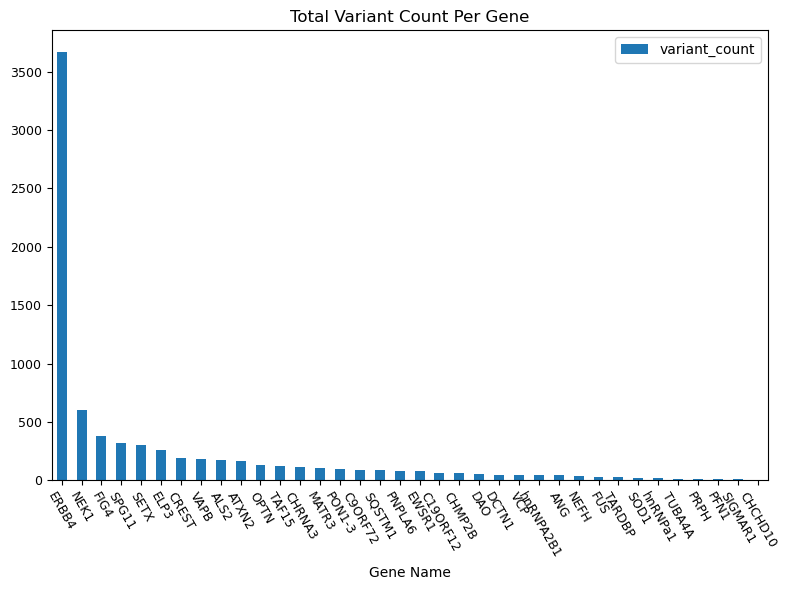

In [30]:
ax= gdf.plot(kind='bar', y="variant_count", x="gene",figsize=(8,6),fontsize=9)
ax.set_title("Total Variant Count Per Gene")
ax.set_xlabel("Gene Name")
plt.xticks(rotation=-60)
plt.tight_layout()
plt.show()

### Top 5 genes in terms of total variant counts across all genomes

In [31]:
top_genes = list(gdf['gene'][0:5])
top_genes

['ERBB4', 'NEK1', 'FIG4', 'SPG11', 'SETX']

# 2. Create Stacked Bar Chart (2x)
#### -  X axis: genome
#### -  Y axis: variant count
#### -  Take the mean for each gene across the 99 genomes to select the top 5 genes to include in the chart
#### -  Threshold of stacked bar charts: mean + SD, mean - SD

In [32]:
df = pd.read_csv(infile)
df = df[genome_ids]


## 2.1: Get the top genomes and bottom genomes in terms of total variant counts across all genes

In [33]:
hdf=pd.DataFrame()
hdf['count'] = df.sum()

In [34]:
hdf.reset_index(inplace=True)

In [35]:
hdf.head()

,index,count
0,HG00613,700
1,HG00692,838
2,HG00479,1091
3,HG00536,1026
4,HG00583,855


In [36]:
mean,std = hdf['count'].mean(),hdf['count'].std()
mean,std

(np.float64(864.1904761904761), 210.0423077912425)

## Find top and bottom genomes using mean & STD

In [37]:
top_genomes = list(hdf[hdf['count'] > mean+std]['index'])
bottom_genomes = list(hdf[hdf['count'] < mean-std]['index'])

In [38]:
len(top_genomes)

21

In [39]:
len(bottom_genomes)

18

In [40]:
df = pd.read_csv(infile)
df = df[genome_ids + ['gene']]

sdf=df.groupby(["gene"]).sum()

In [41]:
sdf.head()

,HG00613,HG00692,HG00479,HG00536,HG00583,HG00565,HG00566,HG00701,HG00500,HG00620,...,HG00622,HG00475,HG00530,HG00422,HG00708,HG00458,HG00437,HG00449,HG00436,HG00611
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,6,11,4,12,17,19,7,1,8,17,...,7,8,1,2,23,23,24,20,2,0
ANG,6,0,1,6,5,3,1,6,6,6,...,4,1,2,1,14,2,2,1,6,0
ATXN2,4,6,5,3,2,2,11,6,2,3,...,16,6,12,2,19,4,6,4,1,0
C19ORF12,9,11,7,4,13,8,10,12,11,6,...,5,13,13,16,4,6,20,5,12,11
C9ORF72,21,18,33,0,20,0,10,12,2,34,...,1,14,12,21,12,17,14,13,13,1


In [42]:
tgdf= sdf.loc[top_genes]

In [43]:
tgdf_top_genomes = tgdf[top_genomes]

In [44]:
tgdf_bot_genomes = tgdf[bottom_genomes]

In [45]:
tgdf_top_genomes.head()

,HG00479,HG00566,HG00620,HG00443,HG00473,HG00593,HG00653,HG00650,HG00614,HG00472,...,HG00448,HG00654,HG00684,HG00584,HG00524,HG00689,HG00672,HG00407,HG00598,HG00675
gene,,,,,,,,,,,,,,,,,,,,,
ERBB4,728,802,552,669,739,532,573,657,594,547,...,691,819,695,546,575,744,670,701,661,500
NEK1,8,187,186,3,10,187,209,2,8,188,...,188,183,5,185,185,186,190,45,188,8
FIG4,37,34,31,56,58,57,50,59,76,48,...,38,17,56,74,68,84,24,58,25,53
SPG11,52,3,4,6,51,51,93,54,91,3,...,58,95,93,92,0,3,1,94,119,93
SETX,73,22,66,68,56,71,22,6,51,32,...,89,54,21,40,48,27,28,51,74,73


In [46]:
tgdf_bot_genomes.head()

,HG00651,HG00683,HG00409,HG00581,HG00717,HG00442,HG00707,HG00592,HG00690,HG00705,HG00674,HG00533,HG00631,HG00513,HG00589,HG00663,HG00449,HG00436
gene,,,,,,,,,,,,,,,,,,
ERBB4,207,151,269,290,183,231,172,186,220,250,210,222,258,165,218,265,191,275
NEK1,8,8,6,5,187,8,9,6,3,6,7,9,9,7,3,41,7,2
FIG4,35,51,33,42,76,77,29,82,36,38,40,30,58,58,66,50,37,80
SPG11,42,3,95,7,3,6,5,2,6,5,122,95,8,3,4,4,5,5
SETX,7,69,43,28,25,7,42,9,24,53,8,35,24,69,23,18,21,43


## Plot stacked bar chart for top genes & top genomes

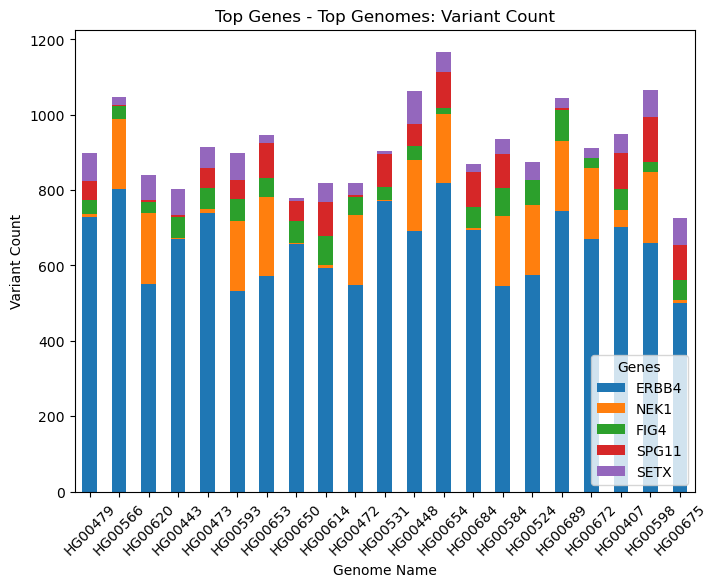

In [47]:
ax = tgdf_top_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Top Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()

## Plot stacked bar chart for top genes & bottom genomes

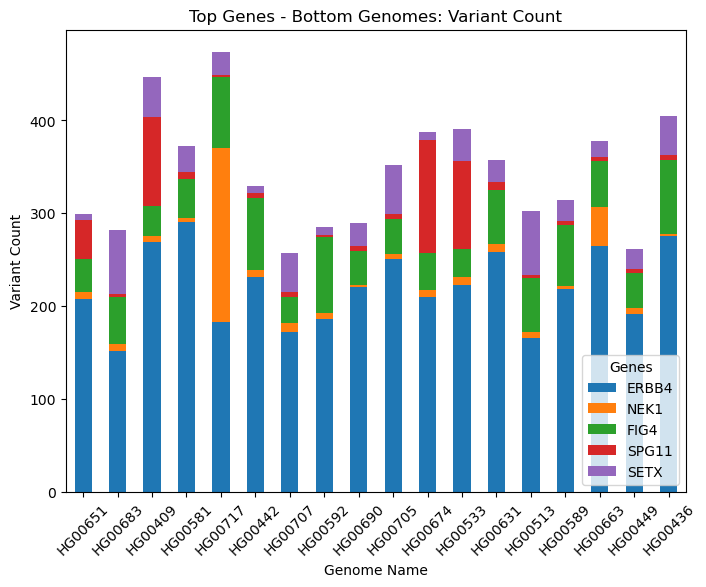

In [48]:
ax = tgdf_bot_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Bottom Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()